In [6]:
#Importing the required libraries
from __future__ import print_function
import h5py
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import math

## Field on Axis of Current Loop: 
$$ B_z = \frac{\mu_0}{4\pi}\frac{2\pi R^2 I}{(z^2+R^2)^\frac{3}{2}} $$

Here,
$$ \mu_0 = 4\pi×10^{−7}    \frac{Tm}{A}$$

So,
$$ B_z = \frac{2\pi R^2 I}{(z^2+R^2)^\frac{3}{2}} ×10^{−7}   T$$

In [2]:
R = 0.0127  # 0.5 in to m
I = 0.01    # in A
z = 0.0762  # 3 in

In [27]:

Bz = ((2*math.pi*(pow(R,2)*I))/pow((pow(z,2) + pow(R,2)), (3/2)))*pow(10,-7)

print(Bz)

2.198232180362257e-09


In [50]:
loop_radious_in = 0.5  # 0.5 in to m
loop_current_mA = 10      #  mA
vertical_z_in = 3         # in

R = loop_radious_in*0.0254
I = loop_current_mA/1000
z= vertical_z_in*0.0254

print(R,I,z)


def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

def calculate_field(R, I, z):
    return ((2*math.pi*(pow(R,2)*I))/pow((pow(z,2) + pow(R,2)), (3/2)))*pow(10,-7)

print(z, calculate_field(R, I, 0.05))
print(z, calculate_field(R, I, 0.1))
print(z, calculate_field(R, I, 0.4))
        
start = 1/100
stop  = .12
step  = 1/100
        
df = pd.DataFrame({'loopCurrent': [], 'loopRadious': [], 'vertical_z': [], 'field': []})

for k in my_range(start, stop, step):
    i = I
    j = R
    #k = z
    l = calculate_field(j, i, k)
    df = df.append({'loopCurrent': i, 'loopRadious': j, 'vertical_z': k , 'field': l}, ignore_index=True)
    
print("Calculation Done, DF created")
#df.head(11)

0.0127 0.01 0.07619999999999999
0.07619999999999999 7.381574497355086e-09
0.07619999999999999 9.893820822709306e-10
0.07619999999999999 1.581069544404309e-11
Calculation Done, DF created


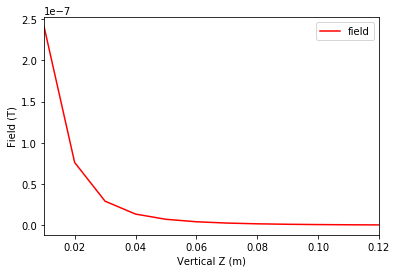

In [49]:
#Plotting the data
ax = plt.gca()
df.plot(kind='line',x='vertical_z',y='field',color='red', ax=ax)
ax.set_xlabel("Vertical Z (m)")
ax.set_ylabel("Field (T)")
plt.show()